# Beweegbare brug casus
## Proces 'Functioneel Specificeren'
Functioneel specificeren is een eenvoudig proces om eisen op te stellen voor een te bouwen systeem. Hiertoe worden een objectenboom, een functieboom en eisen opgesteld. Dit proces moet niet worden verward met functionele analyse zoals bedoeld in het proces voor Functionele Analyse. De twee aanpakken zijn fundamenteel verschillend. Bij Functioneel Specificeren zijn functies bedoeld als "hoog-over" systeemmogelijkheden, terwijl bij Functionele Analyse functies gedragsbeschrijvingen (transformaties van Energie, Materiaal of Informatie) zijn.

`Functieboom` is een hierarchie van functies, waarbij de *onderliggende* functies samen de *bovenliggende* functie vormen.  
`Objectenboom` is een hierarchie van systeemelementen, die de dienst doen als functievervullers.  
`Eisen`, oftwel de functionele eisen, zijn eisen die behoren bij een functie. De criteria waaraan die eisen moeten voldoen (volledigheid, precisie) hangt sterk af van de organisatie die de eisen opstelt.

## Stappenplan
In de casus zullen we het volgende stappenplan volgen:

1. Identifieer het systeem
2. Bepaal wat het systeem moet doen (opgeschreven als `werkwoord` + `lijdend voorwerp`).
3. Stel de eisen op voor idere functie die zojuist zijn geidentificeeerd
4. Werk het systeem uit in subsystemen (decompositie), zodanig dat deze voldoet aan de eisen.

**aandachtspunten**
1. Een systeem heeft *gegeven* `externe raakvlakken` / interfaces. Denk daarbij aan de inpassing in de omgeving, contextsystemen, etc. Alle relaties met entiteiten die zelf niet binnen de systeemgrenzen vallen.  Externe raakvlakken **kunnen** eisen opleggen aan het systeem.
2. Als een systeem wordt opgeknipt in subsystemen, dan dienen die subsystemen samen weer het systeem te vormen, qua structuur *maar ook qua gedrag*. Dat houdt in dat elke decompositie van een systeem leidt tot een verzameling subsystemen die onderling een interactie moeten aangaan. Die interactie verloopt via `interne raakvlakken`. Eisen voor die interne raakvlakken dienen ook opgesteld te worden.

In de casus zullen we min of meer het proces van functioneel specificeren volgen. De opdrachten leiden langs de stappen van functioneel specificeren.


## Het probleem
Er zijn twee verkeesrstromen (scheepvaart en wegverkeer) die elkaar moeten kruisen.

![probleem](Problem-to-be-solved.png)

Mogelijke oplossingen:
1. Een tunnel onder de rivier
2. Een (hoge) vaste brug over de rivier
3. Een beweegbare brug over de rivier
4. Omrijden, Luchtbrug, 'Star Trek' transporter etc....

Er is een besluit genomen om een beweegbare brug te gebruiken om de twee modaliteiten te laten kruisen. Deze beslissing kan overigens al worden gezien al een ontwerpbeperking of eis.

![casus](Bridge-as-principal-solution.png)


## Klassikale opdracht
De eerste stap!

We vragen ons in de eerste instantie af:

1. Wat is het systeem, *precies*?
 - Wat zijn de mensgemaakte dingen?
 - Wat zijn de natuurlijke dingen in de omgeving?
2. Wat gaat er in / of uit het systeem (materiaal, energie en/of informatie)?
3. Waardoor wordt de totstandkoming en/of werking van het systeem beinvloedt?

Alle elementen die we hierboven hebben geidentificeerd moeten in een package komen. Een package is een soort container, of vergelijkbaar met een folder in een directory-structuur. Die structuur hiervoor is volledig naar eigen smaak in te richten, maar voor nu definieren we een simpele package om de verkeersstromen te modelleren.

Om een package te definieren, gebruiken we het keyword `package`, gevolgd door de naam van de package. Dus: 
```
package Verkeer {  
}
```
Tussen de accolades die na het keyword + naam komt plaatsen we de items. Een item wordt gespecificeerd met het keyword `item`, gevolgd door de naam. De `statement` sluiten we altijd af met een `;`.

```
item def naam_van_de_item;
```

We defineren nu eerst `voertuig` en `vaartuig`. (Aan andere verkeersstromen zoals voetgangers, treinverkeer, etc.  wordt nu even niet gedacht...)

In [8]:
package 'Verkeer definities' {
    item def t_voertuig;
    item def t_vaartuig;
}

Package Verkeer definities (3af44264-e164-4a5e-a838-0e71b72fa299)


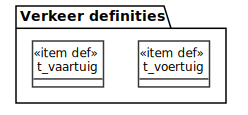

In [9]:
%viz "Verkeer definities"

Nu hebben we een idee hoe de SysML v2 code wordt geinterpreteerd en gevisualiseerd in Jupyter.


# Usage en Definition

> Wat betekent het woordje `def`?

Een van de meest belangrijke concepten binnen SysML v2 is:

- de *definition*, een definitie van *iets* (de `def`)
- een *usage*, waarin de een gedefinieerd *iets* wordt gebruikt in een context

In SysML v2 ontstaat dan het volgende patroon: 

In [10]:
package 'SysML pattern' {

    part context1 {
        /* Dit is de context waarin element_type wordt gebruikt */
        part element: element_type {
        }
    }
    
    part context2 {
        part element: element_type{
        /* Dit is een gebruik van element_type */
        }
    }
        
    part def element_type {
        /* Dit is een definitie. */
    }
}

Package SysML pattern (20881159-9a6f-4e03-b8ae-a49588782499)


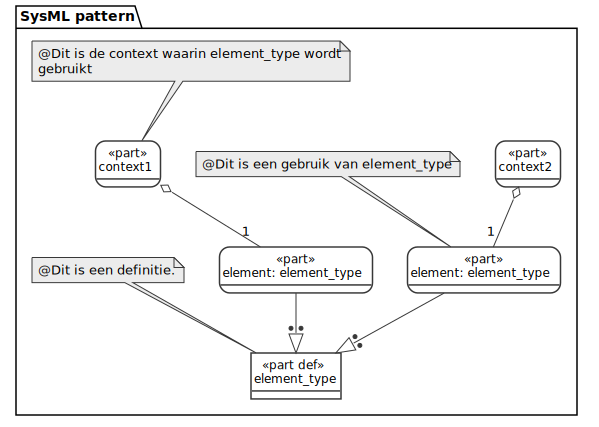

In [11]:
%viz "SysML pattern"

Hierboven zijn zojuist `part` en `part def` geintroduceerd. Een `part` (een systeemelement) is een instantie van een `part def`. Dit patroon is consistent doorgevoerd in SysML v2, en geldt dus alle model 'dingen' die gemodelleerd kunnen worden.

De volgende 'dingen' kunnen worden gemodelleerd:

| Usage       | Definition      | Beschrijving
|-------------|-----------------|-----------------------------------------------------------
| part        | part def        | Een systeemelement
| attribute   | attribute def   | Een eigenschap van een modelelement
| port        | port def        | Een interface van een systeemelement
| action      | action def      | Een functie of transformatie (gedrag)
| state       | state def       | Een toestand (van een systeemelement)
| constraint  | constraint def  | Een invariant (logische expressie) die waar moet zijn
| requirement | requirement def | Een eis
| connection  | connection def  | Een connector die systeemelementen of interfaces verbindt
| item        | item def        | Een ding zonder nadere specificatie

## Opdracht 0. Defineer het system of interest

Kies het juiste SysML modelleer-element en maak een package aan met de **definitie** van het *system of interest* (m.a.w. het type van de brug).
We hadden in het klassikale voorbeeld de (types van) ingaande en uitgaande 'dingen' van het systeem al bepaald. We kunnen nu specificeren **wat** in en uit het systeem gaat mbv de keywords `in` en `out`. Door `in` of `out` voor de instantiaties van die `item def`'s te zetten geven we aan dat die items in of uit het systeem komen.   
Specificeer de in- en uitgaande items.  
Ter discussie met je buurman: zie de vraag in het commentaar in onderstaande SysML specificatie.

In [12]:
package 'Missiesystemen definitie'{
    import 'Verkeer definities'::*;
    
    // Plaats hieronder de definitie van een brug
    // Waarom staat hierboven import <packagenaam>::*;
    // Wat zou dat betekenen ?
    // tip: kijk wat er gebeurt als je de regel weghaalt. door er // voor te zetten
    
    part def t_Brug{
        in  item voertuig_in  : t_voertuig;
        out item voertuig_uit : t_voertuig;
        in  item vaartuig_in  : t_vaartuig;
        out item vaartuig_uit : t_vaartuig;
    }
}

Package Missiesystemen definitie (e235df2e-5b30-4da9-81c1-3f48f947be25)


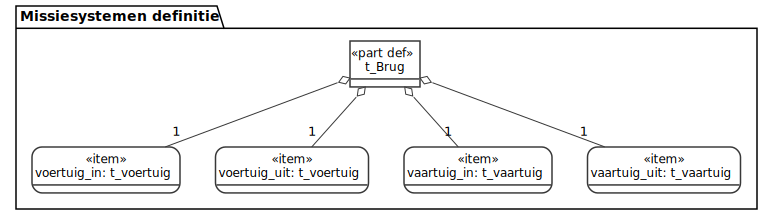

In [13]:
%viz "Missiesystemen definitie"


## Opdracht 1. Defineer de operationele omgeving

Maak een packagestructuur die als volgt is georganiseerd:

```
Operationele Omgeving
  Mensgemaakte Systemen
  Natuurlijke ongevingselementen
  Geinduceerde Omgevingselementen
```

- Plaats `t_Waterbody` (representatie voor de rivier) en `t_Motorway` (Representatie voor de weg) in de juiste package.
- Plaats ook een usage van t_Brug in de specificatie.

Speel eens met part en part def: Haal de "def" van de "part def" van 'Operationele Omgeving' af. 
Wat gebeurt nu?

Een decompositie alleen is niet voldoende om het *system of interest* volledig af te bakenen. Tussen de mensgemaakte- en natuurlijke omgevingselementen zijn ook verbindingen. 

Om een `connection` tussen 2 systeemelementen te specificeren kan gebruik gemaakt worden van de volgende constructie:

```
// eerst definieren we een type voor het raakvlak
connection def raakvlaktype {
    end: t_systeemelement1;
    end: t_systeemelement2;
}

// vervolgens instantieren we het raakvlak
connection: raakvlaktype connect X to Y;
```
X en Y zijn de twee systeemelementen die met elkaar verbonden moeten worden.

- definieer de verbindingen tussen de verschillende parts

Als laatste dient te worden gespecificeerd welke items over de connecties worden uitgewisseld. 

In [14]:
package 'OperationeleOmgeving' {
    
    import 'Verkeer definities'::*;
    import 'Missiesystemen definitie'::*;
    
    package 'Mensgemaakte Systemen'{
        doc /* Door mensen gemaakte systemen, die een 
        relatie hebben met het SOI */
        part def t_Snelweg {
            in  item voertuig_in  : t_voertuig;
            out item voertuig_uit : t_voertuig;
        }    
    }   
    
    package 'Natuurlijke Omgevingselementen'{
        doc /* Natuurlijke omgevingselementen - of factoren
        voor het systeem, die niet door de mens zijn gemaakt. */
        part def t_Waterlichaam {
            in  item vaartuig_in  : t_vaartuig;
            out item vaartuig_uit : t_vaartuig;
        }
    }
    
    package 'Geinduceerde Omgevingselementen'{
        doc /* Fenomenen die optreden als natuurlijke omgevingselementen interacteren
        met mensgemaakte systemen (bijv. bliksem, luchttemperatuur, lichtniveau) */
            
    }
    
    part 'Operationele Omgeving' {
        part rechts:         'Natuurlijke Omgevingselementen'::t_Waterlichaam;
        part links:          'Natuurlijke Omgevingselementen'::t_Waterlichaam;
        part boven:          'Mensgemaakte Systemen'::t_Snelweg;
        part onder:          'Mensgemaakte Systemen'::t_Snelweg;
        part brug: t_Brug;
        
        connection def t_wegaansluiting {
            end: 'Mensgemaakte Systemen'::t_Snelweg;
            end: t_Brug;
        }

        connection def t_vaarwegaansluiting {
            end: 'Natuurlijke Omgevingselementen'::t_Waterlichaam;
            end: t_Brug;
        }
        
        connection: t_wegaansluiting     connect onder  to brug;
        connection: t_wegaansluiting     connect boven  to brug;
        connection: t_vaarwegaansluiting connect rechts to brug;
        connection: t_vaarwegaansluiting connect links  to brug;
        
        flow of t_voertuig from boven.voertuig_uit to brug.voertuig_in;
        flow of t_voertuig from brug.voertuig_uit to boven.voertuig_in;
        flow of t_voertuig from onder.voertuig_uit to brug.voertuig_in;
        flow of t_voertuig from brug.voertuig_uit to onder.voertuig_in;
        
        flow of t_vaartuig from rechts.vaartuig_uit to brug.vaartuig_in;
        flow of t_vaartuig from rechts.vaartuig_in to brug.vaartuig_uit;
        flow of t_vaartuig from links.vaartuig_uit to brug.vaartuig_in;
        flow of t_vaartuig from links.vaartuig_in to brug.vaartuig_uit;
    }
}

Package OperationeleOmgeving (064246b0-110c-4945-85ee-5d651c6852f6)


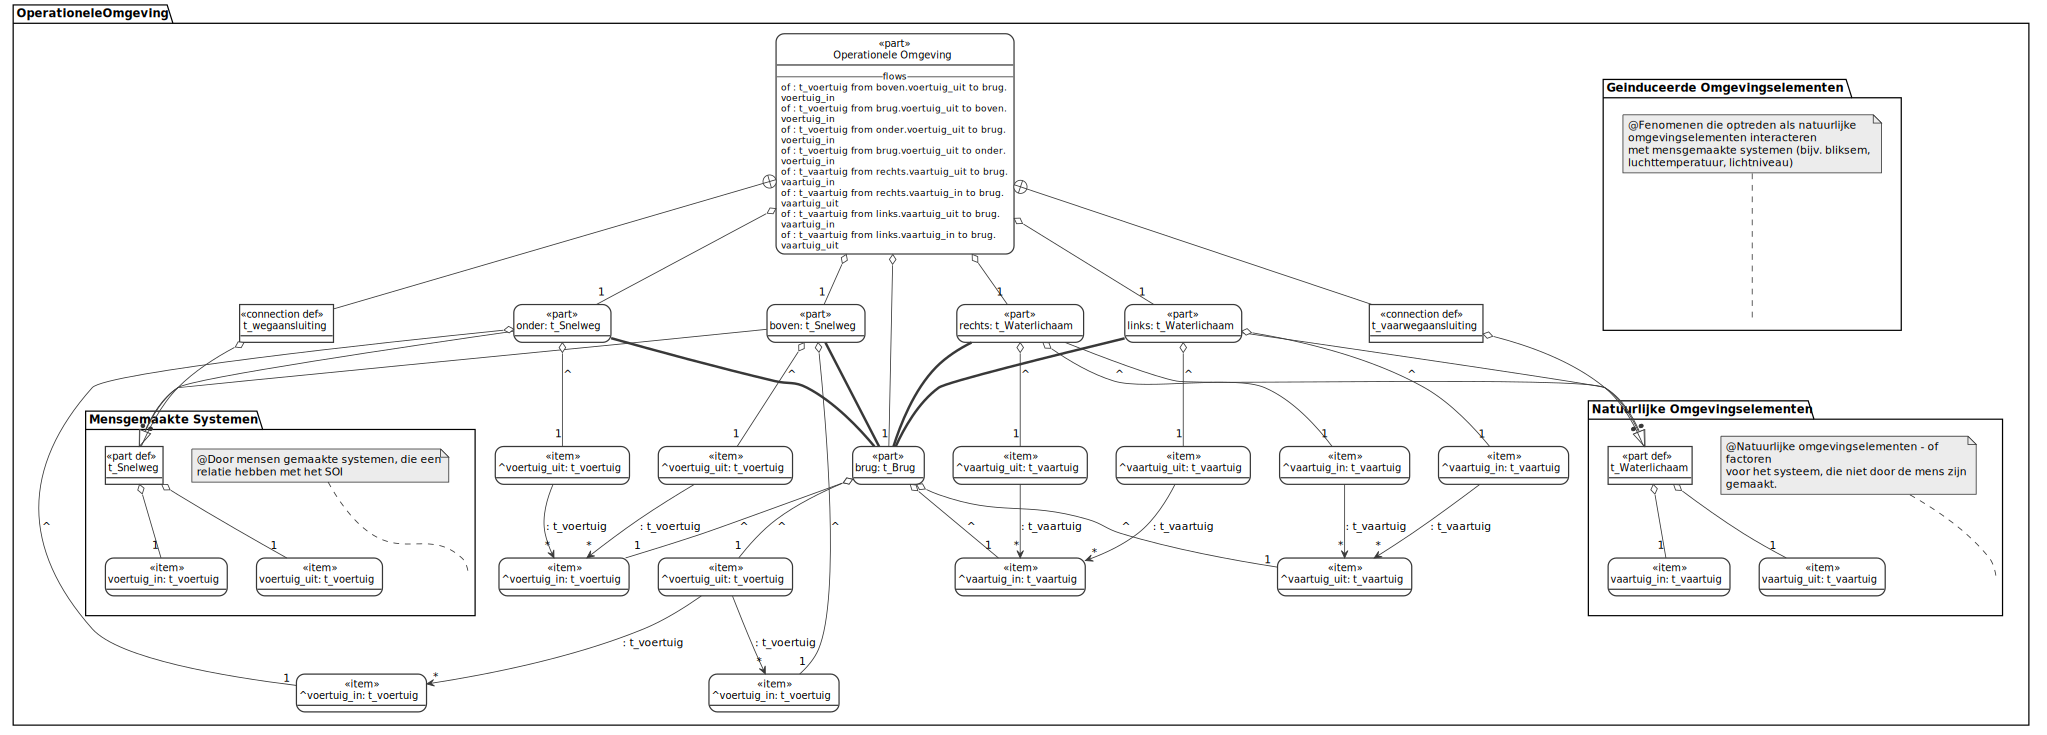

In [15]:
%viz OperationeleOmgeving

Het resultaat van de diagramgeneratie begint nu wel druk te worden. (Sommigen zouden zeggen: een zooitje...). Het is echter mogelijk om deze diagrammen netter te maken door `viewpoint`s en `view`s te definieren, waarmee diagrammen en tabellen kunnen worden gegenereerd. Dit laten we over aan de deelnemer om zelf te proberen. Dit gaat nog niet in Jupyter (dit pakket). Er is  ook een Eclipse IDE meegeleverd die deze `rendering` mogelijk wel kan uitvoeren. Dat is door de auteurs van de workshop nog niet uitgeprobeerd. Zelf proberen, garantie tot de deur.... Aanwijzingen hiervoor staan in de file `playground.ipynb`.

## Opdracht 2. Functies

In het eerste diagram in dit document werd gesproken over `Kruisen verkeerstromen`. Beschouw dit als de topfunctie van het systeem. Het systeem is hier nu een `Beweegbare Brug: t_Brug`.  Welke onderliggende functies kunnen worden geidentificeerd?

Functies worden beschreven door de `action` (een *usage*) of `action def` (een *definition*).

```
action naam_van_modelelement {  
/* hier komt de inhoud van de action */  
}
```

of:

```
action def naam_van_modelelement {  
/* hier komt de inhoud van de action */  
}
```

Bedenk dat als een definitie wordt gemaakt, er ook nog een *usage* moet worden gemaakt: de functie moet nog worden geinstantieerd.
Functies staan in een functieboom, en voor de functieboom maken we een package aan. (bijv. `Functieboom`)

In [16]:
package Functieboom {
    action 'Kruisen Verkeersstromen'{
        action 'Passeren Scheepvaartverkeer'{
            action 'Stoppen Scheepvaartverkeer';
            action 'Doorlaten Scheepvaartverkeer';
        }
        action 'Passeren Wegverkeer'{
            action 'Stoppen landverkeer';
            action 'Doorlaten Landverkeer';
        }
    }
}

Package Functieboom (8c4fa820-2fe5-4cd6-8dfd-08bbffebbc1c)


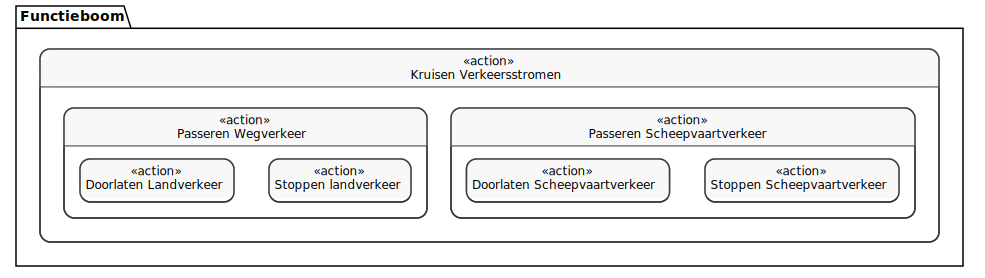

In [17]:
%viz Functieboom

## Opdracht 3. Eisen

De behoefte bestaat om te kunnen communiceren met scheepvaartverkeer en de weggebruikers. Hiervoor kan in beginsel van alles worden gekozen. 
Zo kent ons spoorwegennet twee vormen van communicatie, 'analoog" en "digitaal'. De analoge variant zijn seinen(communicatie met licht), de digitale variant behelst een sein in de cabine  van de machinist (ERTMS).

Voor de bruggen kiezen we voor een analoge variant (digitaal is nu nog niet mogelijk). Deze beslissing is een ontwerpbesluit / requirement.
In SysML kenden we een speciale eis: de `<<designConstraint>>`. Die kent SysML v2 niet. (Die is overigens wel te maken, want SysML v2 kent mechanismen om de taal uit te breiden). We beschouwen de beslissingen nu even als systeemeisen. De SysML v2 specificatie staat hieronder.

In [18]:
package 'Systeemeisen' {
    
    requirement <'eis0001'> 'Communicatie met weggebruikers' {
        /* Communicatie met weggebruikers dient plaats te vinden door het geven van 
        lichtsignalen door middel van verkeerslichten */
    }
    
    requirement <'eis0002'> 'Communicatie met scheepvaartverkeer' {
        /* Communicatie met weggebruikers dient plaats te vinden door het geven van 
        lichtsignalen door middel van scheepvaartseinen */
    }
}

Package Systeemeisen (e100074c-5db2-43b8-b797-cd8553f2cd72)


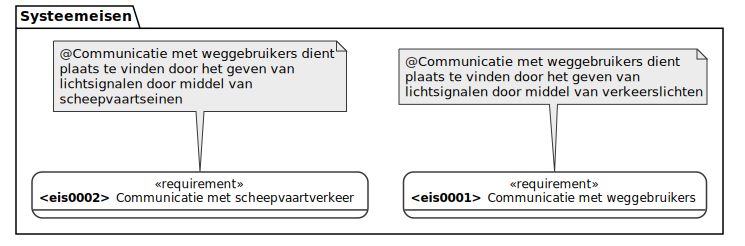

In [19]:
%viz Systeemeisen

Conform de aanpak van Functioneel specificeren moeten nu per functie eisen worden opgesteld. Dat impliceert dat functionele eisen **afhankelijk zijn** van de functies. We besluiten dat we die afhankelijkheid modelleren met een `dependency`. 

Een voorbeeld van het definieren van een dependency:

In [20]:
package voorbeeld {
    part a;
    part b;
    
    // a is afhankelijk van b
    dependency from a to b;
}

Package voorbeeld (1d4fc80d-a29b-473e-934a-5d775677487c)


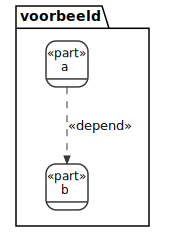

In [21]:
%viz voorbeeld

Stel nu zelf een eis op, en koppel deze aan een functie naar keuze met een dependency. 

In [22]:
package 'Functionele Eisen' {
    import Functieboom::*;
    
    requirement <'eis0003'> 'Tonen groen scheepvaartsein' {
        /* Alleen en slechst alleen als de val vergrendelt is in de open positie,
        * mogen de scheepvaartseinen een 'doorvaart toegestaan' signaal geven.
        */
    }
    
    dependency from 'Tonen groen scheepvaartsein' to 
        'Kruisen Verkeersstromen'::'Passeren Scheepvaartverkeer'::'Doorlaten Scheepvaartverkeer';
}

Package Functionele Eisen (7d6ef6af-c028-493c-9f04-e7995fa6facf)


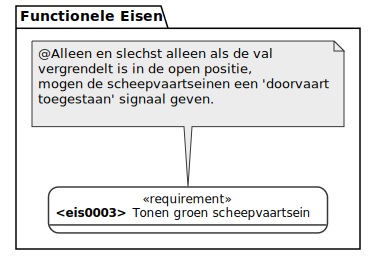

In [23]:
%viz "Functionele Eisen"

## Opdracht 4. Systeemontwerp

Decomponeer het brugsysteem in zijn onderdelen conform de decompositie in het SysML 1.x model

Een brug bestaat uit:
- een (beweegbare) val
- een vaarweg (onder de val, tussen de scheepvaartseinen)
- Bruglichten, (nodig om te kunnen communiceren met de weggebruiker)
- Scheepvaartseinen (nodig om te kunnen communiceren met scheepvaartverkeer(
- Een besturingssysteem (typisch een PLC, elke platform dat beslissingen kan nemen is ok)

Plaats deze 'dingen' in een package voor de missiesystemen (de systemen die we nodig hebben om het probleem van de stakeholders/klant op te lossen)


In [24]:
package 'Missiesystemen'{
    
    import Systeemeisen::*;
    
    
    part def t_brug {
        part de_val: t_Val;
        part de_vaarweg: t_Vaarweg;
        part t_sein_links: t_Scheepvaartsein;
        part t_sein_rechts: t_Scheepvaartsein;
        part bruglicht_onder: t_Bruglicht;
        part bruglicht_boven: t_Bruglicht;
        part plc: t_Besturing;
        
        satisfy 'Communicatie met weggebruikers';
        satisfy 'Communicatie met scheepvaartverkeer';
    }
    
    part def t_Val {
    }
    
    part def t_Vaarweg {
    }
    
    part def t_Bruglicht {
    }
    
    part def t_Scheepvaartsein {
    }
    
    part def t_Besturing {
    }
}



Package Missiesystemen (eea0a638-7bf3-46f0-82b9-a7f1bdfb728f)


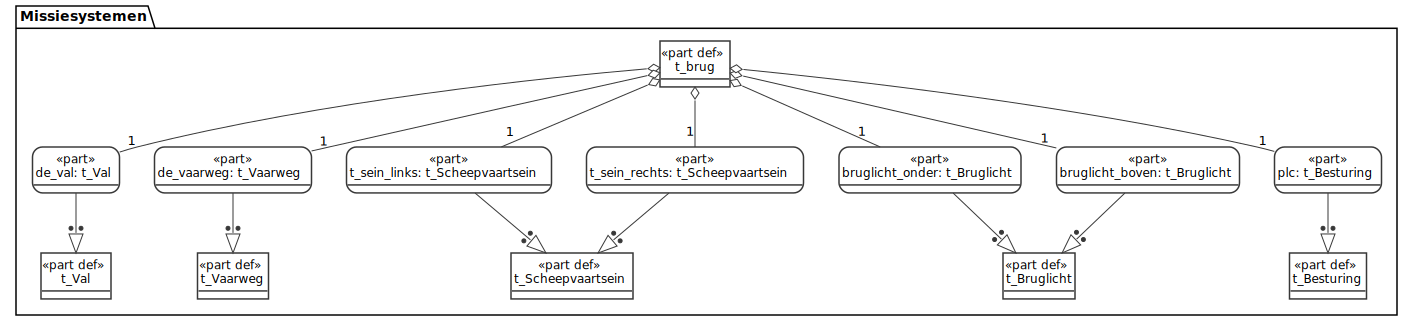

In [25]:
%viz Missiesystemen

## 5. Bonus

Als laatste moeten functies aan systemen worden gekoppeld, Als bonus geven we hier de SysML spec. Probeer zelf te bepalen wat hier nu precies gebeurt.

In [26]:
package Allocaties {
    import Missiesystemen::*;
    import Functieboom::*;
    import OperationeleOmgeving::*;
    
    allocate 'Kruisen Verkeersstromen' to 'Operationele Omgeving';
}

Package Allocaties (dc16211e-7c3a-4133-b95f-e086bc7982b2)


Vanaf dit punt herhalen de stappen van Functioneel Specificeren: 

- definieer functies voor ieder van de subsystemen,
- stel eisen op per functie,
- ontwerp een architectuur die de functies/eisen kan vervullen
- alloceer de functies aan de subsystemen

etc, etc.